In [1]:
# **************************************************************************** #
#                                                                              #
#                                                         :::      ::::::::    #
#                                                       :+:      :+:    :+:    #
#                                                     +:+ +:+         +:+      #
#    By: luicasad <luicasad@student.42.fr>          +#+  +:+       +#+         #
#                                                 +#+#+#+#+#+   +#+            #
#    Created: 2023/10/22 11:17:16 by luicasad          #+#    #+#              #
#    Updated: 2023/10/22 11:17:24 by luicasad         ###   ########.fr        #
#                                                                              #
# **************************************************************************** #

In [2]:
import os
import pandas as pd
import numpy as np
home_dir = os.getcwd()
data_folder =  home_dir +'/../../data/price/'

In [3]:
def	print_head_tail(df):
    print(df.iloc[[0,1, 2, df.index[-3],df.index[-2],df.index[-1]]])
    
def concat_files(data_folder:str, years: range, common_name:str )-> pd.DataFrame:

    #For each year, 
    #   create a dataframe reading a csv file.
    #       At reading time transform "Preu" string into float. And consider "--" strings as NaN.
    #   Append it to a list
    #   Create a dataframe with columns count

    files = []
    counts =[]
    for year in years:
        file = data_folder + str(year) + common_name
        df = pd.read_csv(file, dtype={"Preu":np.float64}, na_values="--")
        files.append(df)
        counts.append(pd.DataFrame(data=df.count(), columns=[year]))
        print(df.shape)
        print(list(df))
    summary = pd.concat(counts, axis=1)
    difference = summary.iloc(0)[0]-summary.iloc(0)[-1]
    print(type(summary), type(difference))
    print(summary)
    print("-"*80)
    print("Any - Preu = NUM NaN")
    print(difference.to_frame().T)
    return pd.concat(files, ignore_index=True)

def count_NAN(df):
    """
    Count NAN values in each column of a dataset.
    Print 8 counts in per line
    """
    col_counter = 1
    for col in df.columns:
        count = df[col].isna().sum()
        if ((col_counter % 8) == 0):
            sep = "|\n"
        else:
            sep = "| "
        print("|{} = {}".format(col,count), end=sep)
        col_counter = col_counter + 1
def create_date_from(year:int, quarter:int)-> str:
    """
    GETS:
    year: a four digit number
    quarter : an integer ranging 1 to 4

    Returns:
    A string date with this format YYYY-MM-DD, where DD refers always to first month day

    OPERATES
    For quarter 1 returns month 1
    For quarter 2 returns month 4
    For quarter 3 returns month 7
    For quarter 4 returns month 10
    """
    month = ((quarter - 1) * 3) + 1
    return str(year) + "-" f"{month:02}"+ "-01"
    

### <span style='color:red'> Llegir i concatenar fitxers de preus<br> </span><span style='color:green'> Lectura y concatenación de los archivos de precios<br></span><span style='color:blue'> Read and concatenate all prize files <br></span>

In [4]:
pd.set_option("display.width", 120)
price = concat_files(data_folder, range(2014, 2024),"_lloguer_preu_trim.csv")


(584, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu']
(584, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu']
(584, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu']
(584, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu']
(584, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu']
(584, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu']
(584, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu']
(584, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu']
(438, 8)
['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte',

In [5]:
print("Original Dataset has {} rows with {} columns.".format(price.shape[0],price.shape[1]))

Original Dataset has 5402 rows with 8 columns.


### <span style='color:red'> Dos tipus de preus (Eur_mes & Eur_m2_mes) a la mateixa columna: Separem-los<br> </span><span style='color:green'> Dos tipos de precios (Eur_mes & Eur_m2_mes) en la misma columna: Separémoslos<br></span><span style='color:blue'> Two types of prices (Eur_mes & Eur_m2_mes) on same column: Let's split it in two columns<br></span>

In [6]:
price["Lloguer_mitja"].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

In [7]:
#Create key for future join
price=price.assign(
    Clau=price[["Codi_Barri", "Any", "Trimestre"]].apply(
        lambda row: ''.join([str(each) for each in row]),axis=1))

In [8]:
#Split dataset in two, each having rows of same price type.
df_eur = price[price["Lloguer_mitja"] == 'Lloguer mitjà mensual (Euros/mes)']
df_eur = df_eur.rename(columns={"Preu": "Eur"})
df_eur_m2 = price[price["Lloguer_mitja"] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
df_eur_m2 = df_eur_m2.rename(columns={"Preu": "Eur_m2"})
df_to_join = df_eur_m2[["Clau","Eur_m2"]]

In [9]:
price = pd.merge(df_eur, df_to_join, on="Clau")
price= price.drop(["Codi_Districte", "Codi_Barri", "Lloguer_mitja", "Clau"], axis = 1)
price["Eur"]=pd.to_numeric(price["Eur"])
print_head_tail(price)

       Any  Trimestre Nom_Districte                 Nom_Barri      Eur  Eur_m2
0     2014          1  Ciutat Vella                  el Raval   589.55   10.76
1     2014          1  Ciutat Vella            el Barri Gòtic   712.79   10.58
2     2014          1  Ciutat Vella            la Barceloneta   540.71   14.40
2698  2023          2    Sant Martí   Provençals del Poblenou  1204.20   16.70
2699  2023          2    Sant Martí  Sant Martí de Provençals   960.90   13.20
2700  2023          2    Sant Martí       la Verneda i la Pau   991.10   14.50


In [10]:
print("Dataset with two price columns has {} rows with {} columns.".format(price.shape[0],price.shape[1]))

Dataset with two price columns has 2701 rows with 6 columns.


### <span style='color:red'> Estudi dels valors Nan<br> </span><span style='color:green'> Estudio de los valores nulos<br></span><span style='color:blue'> Study Nan values <br></span>

In [11]:
count_NAN(price)

|Any = 0| |Trimestre = 0| |Nom_Districte = 0| |Nom_Barri = 0| |Eur = 184| |Eur_m2 = 186| 

In [12]:
grouped_df = price[price["Eur"].isna()
                  ].groupby(['Any', 'Trimestre']).size().unstack()
pd.set_option('display.max_rows', None)
print("Trimestre    1      2      3      4   sum")
for row in grouped_df.iterrows():
    print("{}     ".format(row[0]), end=" ")
    suma = 0
    for data in row[1].values:
        print("{0:4}  ".format(data), end = " ")
        if (data != np.nan):
            suma += data
    print("{0:4}  ".format(suma), end = " ")
    print("{0:.2f}%  ".format(100*suma/292))



Trimestre    1      2      3      4   sum
2014       5.0    3.0    5.0    6.0   19.0   6.51%  
2015       6.0    2.0    4.0    4.0   16.0   5.48%  
2016       2.0    5.0    4.0    4.0   15.0   5.14%  
2017       5.0    4.0    5.0    5.0   19.0   6.51%  
2018       6.0    5.0    6.0    5.0   22.0   7.53%  
2019       6.0    6.0    6.0    5.0   23.0   7.88%  
2020       4.0    7.0    6.0    6.0   23.0   7.88%  
2021       6.0    5.0    6.0    5.0   22.0   7.53%  
2022       6.0    5.0    5.0    nan    nan   nan%  
2023       4.0    5.0    nan    nan    nan   nan%  


In [13]:
Barris_with_NaN =price[price["Eur"].isna()]["Nom_Barri"].unique()
Capitalized = [s.capitalize() for s in Barris_with_NaN]

print("Barris amb preus NaN ==>", Capitalized)


Barris amb preus NaN ==> ['La marina del prat vermell', 'La clota', 'Torre baró', 'Vallbona', 'Baró de viver', 'Can peguera', 'Canyelles']


In [14]:
NaN_prices = price[price["Eur_m2"].isna()]
#print(NaN_prices)
Nan_prices_summary = NaN_prices.groupby(['Nom_Barri']).count()
pd.set_option('display.max_rows', None)
print(Nan_prices_summary["Any"])

Nom_Barri
Baró de Viver                 27
Can Peguera                   32
Canyelles                      3
Torre Baró                    24
Vallbona                      34
la Clota                      36
la Marina del Prat Vermell    30
Name: Any, dtype: int64


### <span style='color:red'> Substitució dels valors Nan<br> </span><span style='color:green'> Substitución de los valores nulos<br></span><span style='color:blue'> Nan values <br></span>

In [15]:
# Only for Canyelles cause it is the barri with less missed data.
# There are two types of prices:
# First we deal with price in eur/month
Canyelles = (price["Nom_Barri"] == 'Canyelles')
print(price[Canyelles][["Nom_Barri", "Any", "Trimestre",  "Eur"]])

      Nom_Barri   Any  Trimestre     Eur
48    Canyelles  2014          1  563.33
121   Canyelles  2014          2  474.29
194   Canyelles  2014          3  532.67
267   Canyelles  2014          4  566.36
340   Canyelles  2015          1     NaN
413   Canyelles  2015          2  575.83
486   Canyelles  2015          3  558.00
559   Canyelles  2015          4  598.04
632   Canyelles  2016          1  619.85
705   Canyelles  2016          2  621.43
778   Canyelles  2016          3  648.75
851   Canyelles  2016          4  617.52
924   Canyelles  2017          1  689.62
997   Canyelles  2017          2  677.50
1070  Canyelles  2017          3  701.50
1143  Canyelles  2017          4  656.15
1216  Canyelles  2018          1  714.68
1289  Canyelles  2018          2  661.88
1362  Canyelles  2018          3  715.45
1435  Canyelles  2018          4  774.38
1508  Canyelles  2019          1  791.90
1581  Canyelles  2019          2  756.40
1654  Canyelles  2019          3  714.40
1727  Canyelles 

In [16]:
# Only for Canyelles cause it is the barri with less missed data
price.loc[Canyelles,"Eur"] = price[Canyelles]["Eur"].fillna(price[Canyelles]["Eur"].rolling(3,min_periods=1).mean())


In [17]:
print(price[price["Nom_Barri"] == 'Canyelles'][["Nom_Barri", "Any", "Trimestre",  "Eur"]])

      Nom_Barri   Any  Trimestre      Eur
48    Canyelles  2014          1  563.330
121   Canyelles  2014          2  474.290
194   Canyelles  2014          3  532.670
267   Canyelles  2014          4  566.360
340   Canyelles  2015          1  549.515
413   Canyelles  2015          2  575.830
486   Canyelles  2015          3  558.000
559   Canyelles  2015          4  598.040
632   Canyelles  2016          1  619.850
705   Canyelles  2016          2  621.430
778   Canyelles  2016          3  648.750
851   Canyelles  2016          4  617.520
924   Canyelles  2017          1  689.620
997   Canyelles  2017          2  677.500
1070  Canyelles  2017          3  701.500
1143  Canyelles  2017          4  656.150
1216  Canyelles  2018          1  714.680
1289  Canyelles  2018          2  661.880
1362  Canyelles  2018          3  715.450
1435  Canyelles  2018          4  774.380
1508  Canyelles  2019          1  791.900
1581  Canyelles  2019          2  756.400
1654  Canyelles  2019          3  

In [18]:
# Second we deal with price in eur_m2/month
# Only for Canyelles cause it is the barri with less missed ata
Canyelles = (price["Nom_Barri"] == 'Canyelles')
print(price[Canyelles][["Nom_Barri", "Any", "Trimestre",  "Eur_m2"]])
#print(price[["Nom_Barri","Lloguer_mitja", "Any", "Trimestre",  "Preu"]])

      Nom_Barri   Any  Trimestre  Eur_m2
48    Canyelles  2014          1    7.35
121   Canyelles  2014          2    5.58
194   Canyelles  2014          3    6.81
267   Canyelles  2014          4    7.70
340   Canyelles  2015          1     NaN
413   Canyelles  2015          2    7.23
486   Canyelles  2015          3    7.00
559   Canyelles  2015          4    7.84
632   Canyelles  2016          1    8.03
705   Canyelles  2016          2    8.10
778   Canyelles  2016          3    8.45
851   Canyelles  2016          4    7.68
924   Canyelles  2017          1    8.05
997   Canyelles  2017          2    8.68
1070  Canyelles  2017          3    8.79
1143  Canyelles  2017          4    8.96
1216  Canyelles  2018          1    9.02
1289  Canyelles  2018          2    9.67
1362  Canyelles  2018          3    9.11
1435  Canyelles  2018          4   10.09
1508  Canyelles  2019          1    9.60
1581  Canyelles  2019          2    9.30
1654  Canyelles  2019          3    9.50
1727  Canyelles 

In [19]:
price.loc[Canyelles,"Eur_m2"] = price[Canyelles]["Eur_m2"].fillna(price[Canyelles]["Eur_m2"].rolling(3,min_periods=1).mean())
print(price[Canyelles][["Nom_Barri","Any", "Trimestre",  "Eur_m2"]])

      Nom_Barri   Any  Trimestre  Eur_m2
48    Canyelles  2014          1   7.350
121   Canyelles  2014          2   5.580
194   Canyelles  2014          3   6.810
267   Canyelles  2014          4   7.700
340   Canyelles  2015          1   7.255
413   Canyelles  2015          2   7.230
486   Canyelles  2015          3   7.000
559   Canyelles  2015          4   7.840
632   Canyelles  2016          1   8.030
705   Canyelles  2016          2   8.100
778   Canyelles  2016          3   8.450
851   Canyelles  2016          4   7.680
924   Canyelles  2017          1   8.050
997   Canyelles  2017          2   8.680
1070  Canyelles  2017          3   8.790
1143  Canyelles  2017          4   8.960
1216  Canyelles  2018          1   9.020
1289  Canyelles  2018          2   9.670
1362  Canyelles  2018          3   9.110
1435  Canyelles  2018          4  10.090
1508  Canyelles  2019          1   9.600
1581  Canyelles  2019          2   9.300
1654  Canyelles  2019          3   9.500
1727  Canyelles 

<span style='color:red'> Podem veure que el Barri de Canyelles (49) ara no té NaNs<br> </span><span style='color:green'> Podemos ver que el Barrio de Canyelles (49) ahora no tiene NaNs<br></span><span style='color:blue'> We can see that the Canyelles neighborhood (49) now has no NaNs <br></span>

In [20]:
NaN_prices = price[price["Eur"].isna()]
#print(NaN_prices)
Nan_prices_summary = NaN_prices.groupby(['Nom_Barri']).count()
pd.set_option('display.max_rows', None)
print(Nan_prices_summary["Any"])

Nom_Barri
Baró de Viver                 27
Can Peguera                   32
Torre Baró                    23
Vallbona                      34
la Clota                      36
la Marina del Prat Vermell    29
Name: Any, dtype: int64


In [21]:
NaN_prices = price[price["Eur_m2"].isna()]
#print(NaN_prices)
Nan_prices_summary = NaN_prices.groupby(['Nom_Barri']).count()
pd.set_option('display.max_rows', None)
print(Nan_prices_summary["Any"])

Nom_Barri
Baró de Viver                 27
Can Peguera                   32
Torre Baró                    24
Vallbona                      34
la Clota                      36
la Marina del Prat Vermell    30
Name: Any, dtype: int64


In [22]:

NaN_barris = price[price["Eur_m2"].isna()]["Nom_Barri"].unique()
barris_NaN = price[price["Nom_Barri"].isin(NaN_barris)]
Nan_prices_summary = barris_NaN.groupby(['Nom_Barri']).count()
print(Nan_prices_summary["Any"])

Nom_Barri
Baró de Viver                 37
Can Peguera                   37
Torre Baró                    37
Vallbona                      37
la Clota                      37
la Marina del Prat Vermell    37
Name: Any, dtype: int64


<span style='color:red'> Suprimem registres de barris amb més NaN que dades<br> </span><span style='color:green'> Borramos los registros de los barrios con más NaNs que datos<br></span><span style='color:blue'> We delete records from neighborhoods with more NaNs than data <br></span>

In [23]:
drop_barris = price[price["Eur"].isna()]["Nom_Barri"].unique()
drop_mask = (price['Nom_Barri'].isin(drop_barris))
price.drop(price[drop_mask].index, inplace = True)
print("Dataset Without neighborhoods with NaNs has {} rows with {} columns.".format(price.shape[0],price.shape[1]))

Dataset Without neighborhoods with NaNs has 2479 rows with 6 columns.


In [24]:
drop_barris

array(['la Marina del Prat Vermell', 'la Clota', 'Torre Baró', 'Vallbona',
       'Baró de Viver', 'Can Peguera'], dtype=object)

In [25]:
NaN_barris

array(['la Marina del Prat Vermell', 'la Clota', 'Torre Baró', 'Vallbona',
       'Baró de Viver', 'Can Peguera'], dtype=object)

In [26]:
price["Any"].values

array([2014, 2014, 2014, ..., 2023, 2023, 2023])

In [27]:
create_date_from(2014, 4)

'2014-10-01'

In [28]:
price=price.assign(
    Date=price[["Any", "Trimestre"]].apply(
        lambda row: pd.to_datetime(create_date_from(row.iloc[0], row.iloc[1])),axis=1))

In [29]:
price.head()

,Any,Trimestre,Nom_Districte,Nom_Barri,Eur,Eur_m2,Date
0,2014,1,Ciutat Vella,el Raval,589.55,10.76,2014-01-01
1,2014,1,Ciutat Vella,el Barri Gòtic,712.79,10.58,2014-01-01
2,2014,1,Ciutat Vella,la Barceloneta,540.71,14.40,2014-01-01
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01,2014-01-01
4,2014,1,Eixample,el Fort Pienc,736.09,10.42,2014-01-01


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
barris = price["Nom_Barri"].unique()
min_price = price["Eur"].min()
max_price = price["Eur"].max()
quarter_locator = mdates.MonthLocator(interval=12)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
fig, axs = plt.subplots(34, 2, figsize=(12, 400))
for ax, barri in zip(axs.flat, barris):
    ax.plot(price[price["Nom_Barri"] == barri]["Date"],price[price["Nom_Barri"] == barri]["Eur"])
    ax.xaxis.set_major_locator(quarter_locator)
    ax.xaxis.set_major_formatter(year_month_formatter)
    ax.yaxis.set_data_interval(min_price,max_price)
    ax.set_title("{} Eur/mes".format(barri))
fig.autofmt_xdate()

In [31]:
barris

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina de Port', 'la Font de la Guatlla', 'Hostafrancs',
       'la Bordeta', 'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron", 'Horta',
       'Vilapicina i la Torre Llobeta', 'Porta',

/tmp/ipykernel_6309/2438662009.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


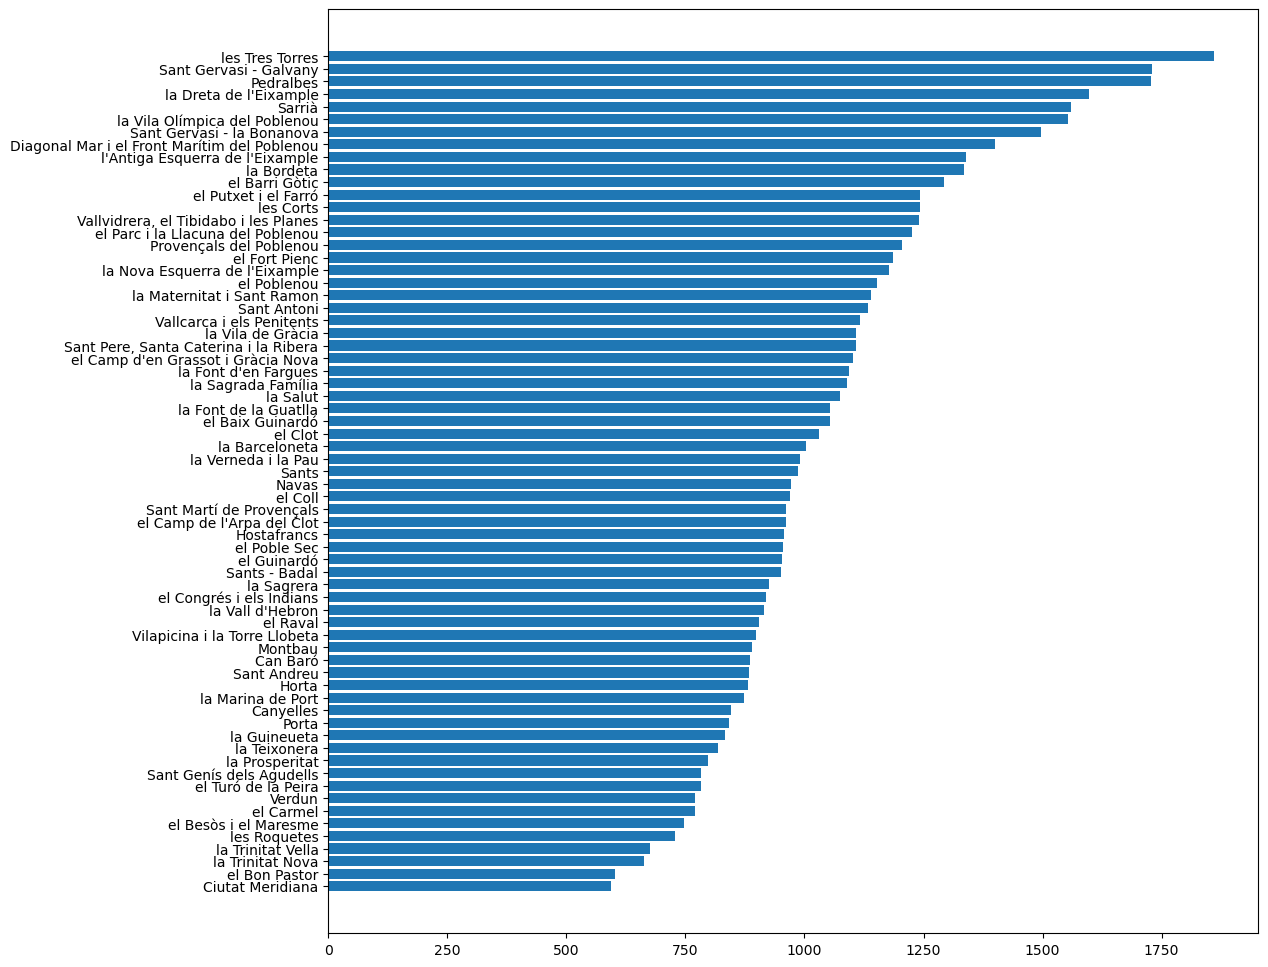

In [32]:
fig, axs = plt.subplots(figsize=(12, 12))
any=2023
trim=2
mask = (price["Any"] == any) &(price["Trimestre"] == trim)
plot_dataframe =  price[mask].sort_values(by="Eur")
axs.barh(plot_dataframe['Nom_Barri'], plot_dataframe['Eur'])
fig.show()